<a href="https://colab.research.google.com/github/joanne-gazmen/Data110-Fall2025/blob/main/Week5%266_JoanneGazmen_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 and 6 Assignment  — Titanic Distributions

 Week 5’s emphasis on **histograms + KDEs** for interpretation. Add a **small, targeted** Week-6 set: **boxplot** (multiple groups), **violin** (age by sex), and a **strip/swarm** overlay. _No ridgeline._

---

## 0) Dataset & Setup
- Use the Seaborn **Titanic** dataset.
- Work in **Google Colab**.

---

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1) Understand the Data
**Task 1 — Dataset overview (5–6 sentences).**  
Identify the variables you will use (`survived, pclass, sex, age, fare, embark_town, sibsp, parch`). briefly explain why these columns matter for your analysis.

---

*  Important variables I will be using in this assignment is **age**, **fare**, **survived**, **sex**, and **class** which are shown below. This is because, if we looked below, the variables needed to complete the tasks include/require some of these variables:
    * **age** This is important, as we need to keep track which age group was affected, and weither they were younger or older.
    * **class** This is the passengers social status, which may can connected to the fare price paid as the more money spent=the class they are in.
    * **fare** Another important variable, as it represents how much a passenger paid to be on the ship. Indicating the passengers financial status
    * **sex** Same as age, we want to keep track of how many males:female ratio survived.
    * **survived** Indicates if a passenger lived or not, which is an important variable to take account for.


In [3]:
#From Professor's Notes, "Load the Titanic dataset directly from Seaborn":
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2) Fare & Survival (Week 5 core)
## **Task 2 — Fare distribution (histogram + KDE).**  
Create a histogram and a KDE of `fare`. Discuss right-skew, outliers, and a socioeconomic interpretation.


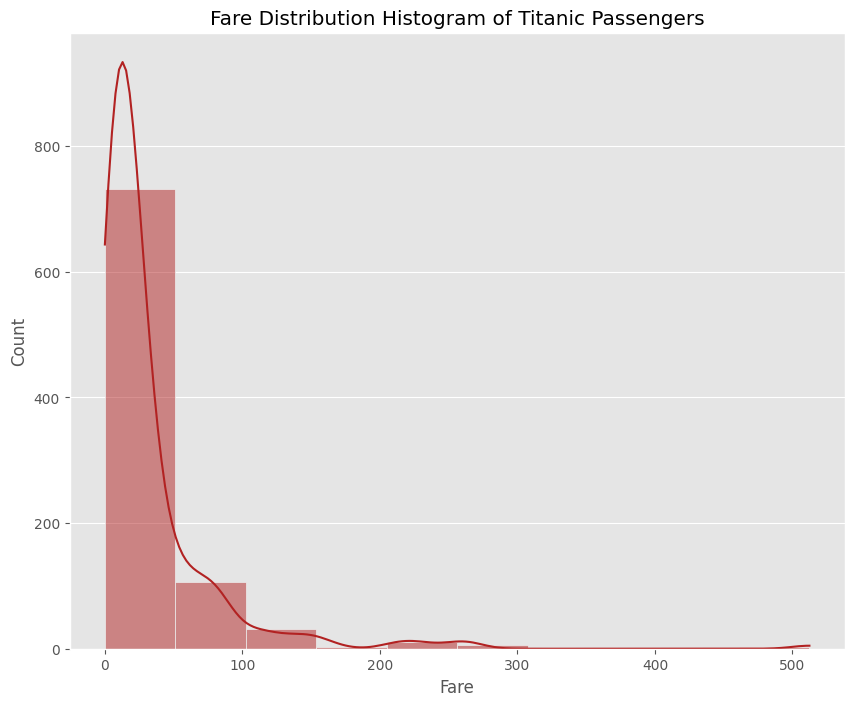

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))
sns.histplot(data=titanic_df, x="fare", bins=10, kde=True, color="firebrick")
plt.title('Fare Distribution Histogram of Titanic Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.grid(axis='x')
plt.show()

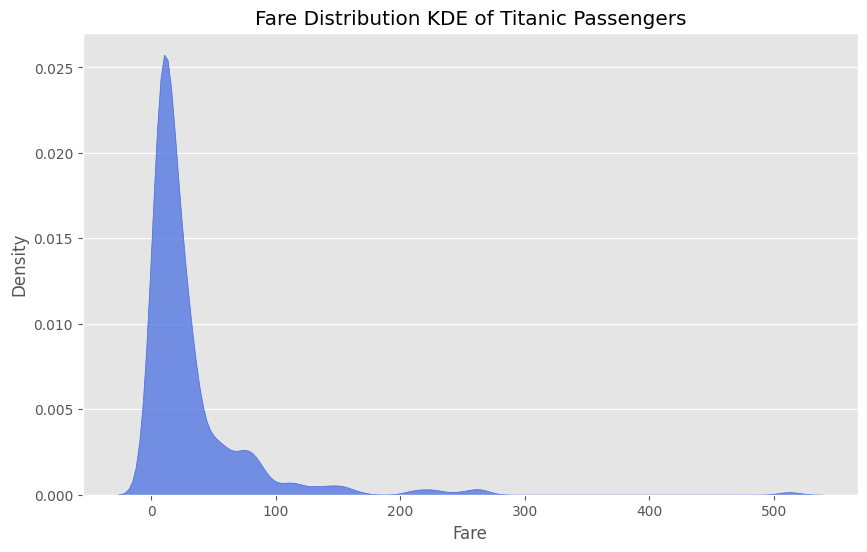

In [5]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic_df['fare'], bw_adjust=0.7, fill=True, color="royalblue", alpha=0.7)
plt.title('Fare Distribution KDE of Titanic Passengers')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.grid(axis='x')
plt.show()

**My findings:** From these two graphs, the fare distribution is heavily skewed toward lower fares(skewed left), showing that most passengers were in third class, while only a few could afford the extremely high first-class fares. This highlights the socioeconomic inequality aboard the Titanic, where wealthier passengers had better accommodations and likely better access to lifeboats, improving their chances of survival.

## **Task 3 — Fare × Survival (distribution comparison).**  
Compare `fare` distributions for `survived = 0` vs `1` (e.g., overlaid KDEs). Focus your interpretation on **distribution shapes**, not just means.

---

/tmp/ipython-input-4114878876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=titanic_df, x='survived', y='fare', palette=['coral','lightgreen'])


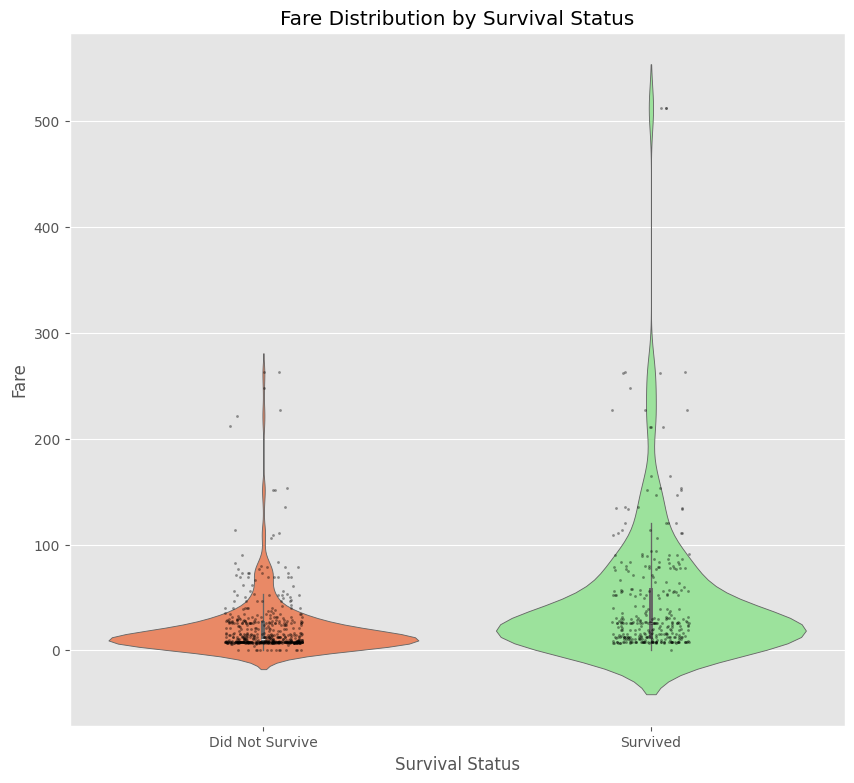

In [29]:
plt.figure(figsize=(10, 9))

sns.violinplot(data=titanic_df, x='survived', y='fare', palette=['coral','lightgreen'])

sns.stripplot(data=titanic_df, x='survived', y='fare', color='k', alpha=0.4, jitter=True, size=2)

plt.xticks([0,1], ['Did Not Survive','Survived'])
plt.title("Fare Distribution by Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Fare")
plt.show()

**My findings:** In this graph, it is shown that non-survivors are mostly concentrated at lower fares, indicating many were from lower classes, while survivors show a wider fare range with more high-fare passengers, suggesting higher economic class increased the chances of survival. The strip plot also highlights small clusters and a few extreme high-fare outliers among survivors.

## 3)  Week-6 Add-Ons (exactly three plots)

## **Task 4 — Boxplot across multiple groups (fare).**  
Make a boxplot of `fare` grouped by `pclass`, with an additional split by `sex`. Interpret what differs across groups.

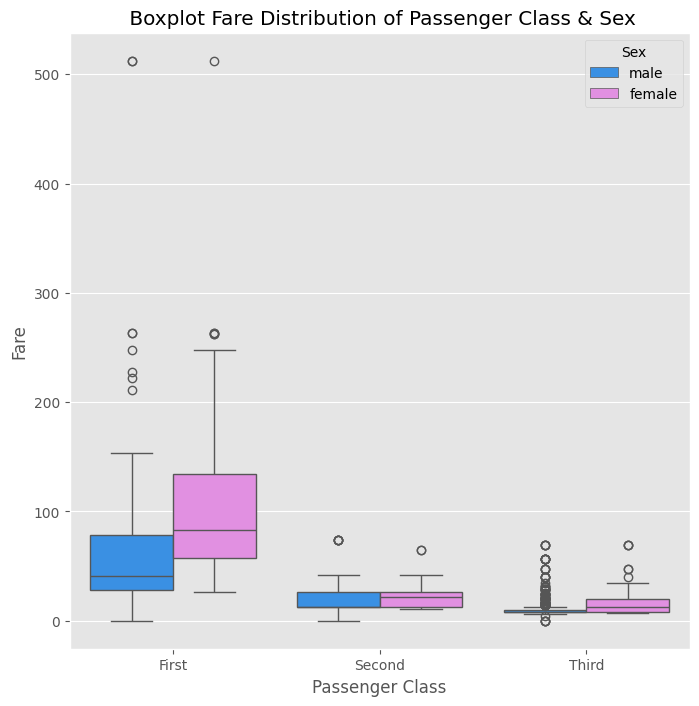

In [20]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=titanic_df, x='class', y='fare', hue= 'sex', palette=['dodgerblue', 'violet'])
plt.title(' Boxplot Fare Distribution of Passenger Class & Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Sex')
plt.show()


**My findings:** This boxplot compares how much male and female passengers paid for tickets across the three passenger classes (First, Second, and Third). Overall, fares decrease significantly from First to Third Class for both sexes.

## **Task 5 — Violin (age by sex).**  
Create a violin plot of `age` by `sex`. State any meaningful differences and what they suggest.


/tmp/ipython-input-450131517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=titanic_df, x='sex', y='age', palette=['cornflowerblue', 'lightpink'])


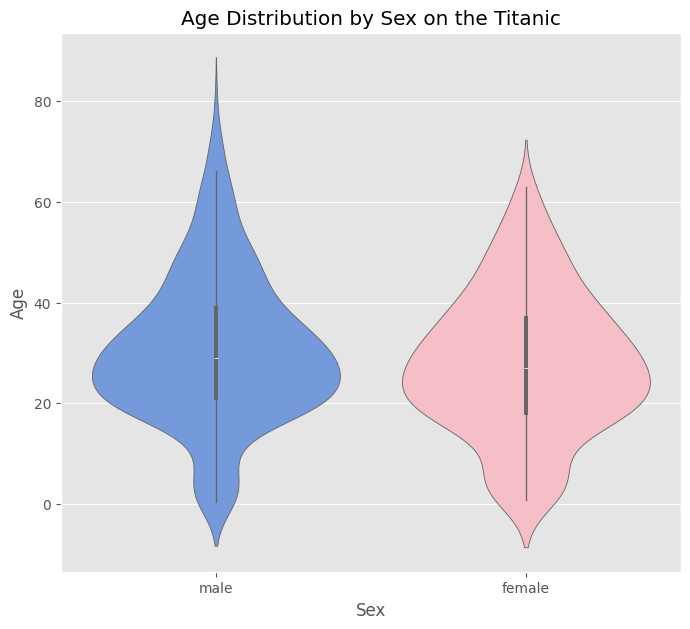

In [16]:
plt.figure(figsize=(8, 7))
sns.violinplot(data=titanic_df, x='sex', y='age', palette=['cornflowerblue', 'lightpink'])
plt.title('Age Distribution by Sex on the Titanic')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

**My findings:** In this graph, I noticed that the male passengers had a wider and slightly older age distribution, while female passengers were more concentrated in younger adult ages with fewer elderly individuals.

## **Task 6 — Strip (detail on top of violin or boxplot).**  
Overlay individual observations to expose clusters and outliers. Explain what becomes visible with points that’s not obvious from the aggregate shape alone.

---

/tmp/ipython-input-769424405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_df, x='sex', y='age', palette=['springgreen', 'plum'])


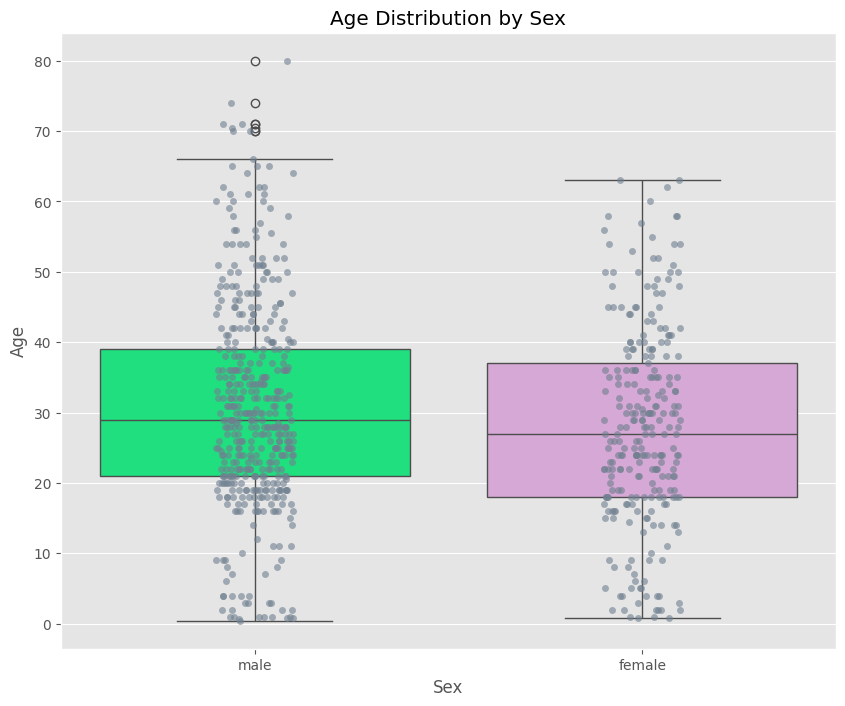

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=titanic_df, x='sex', y='age', palette=['springgreen', 'plum'])
sns.stripplot(data=titanic_df, x='sex', y='age', color='slategrey', jitter=True,  alpha=0.6)

plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

**My findings:** This plot shows the comparison of age distribution between males and females using boxplots with individual data points. You can clearly see concentrations of ages around the mid-20s to early 30s for both males and females. This clustering is not visible from the box shape alone, which only shows spread and quartiles.